In [1]:
from lib import ARCDatabase as adb
import numpy as np
from lib import utils

In [2]:
# Calculate n_Na, n_Cs diagonal first

n_start = 40
n_end = 70
dn = 0

options = dict()

options["atom1"] = "na"
options["atom2"] = "cs"
options["n1"] = 53 # This value will be replaced!
options["n2"] = 54 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [3]:
rs = np.linspace(3,10, 101)
interaction = np.zeros((rs.shape[0], n_end - n_start + 1))
comps = np.zeros((rs.shape[0], n_end - n_start + 1))

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    these_evals, these_comps, these_idxs = utils.get_maximum_overlap_eigenstate(res_evals, res_evecs, res_basis, **options)

    interaction[:, n] = these_evals
    comps[:, n] = these_comps


Calculating Na: 40, Calculating Cs: 40
3.0 has already been calculated!
3.07 has already been calculated!
3.14 has already been calculated!
3.21 has already been calculated!
3.2800000000000002 has already been calculated!
3.35 has already been calculated!
3.42 has already been calculated!
3.49 has already been calculated!
3.56 has already been calculated!
3.63 has already been calculated!
3.7 has already been calculated!
3.77 has already been calculated!
3.84 has already been calculated!
3.91 has already been calculated!
3.98 has already been calculated!
4.05 has already been calculated!
4.12 has already been calculated!
4.19 has already been calculated!
4.26 has already been calculated!
4.33 has already been calculated!
4.4 has already been calculated!
4.470000000000001 has already been calculated!
4.54 has already been calculated!
4.61 has already been calculated!
4.68 has already been calculated!
4.75 has already been calculated!
4.82 has already been calculated!
4.890000000000001 h

In [10]:
n_na = np.linspace(n_start, n_end, n_end - n_start + 1)
n_cs = n_na
data = dict()
data['n_na'] = n_na
data['n_cs'] = n_cs
data['r'] = rs
data['interaction_GHz'] = interaction
data['composition'] = comps


In [9]:
import pickle

In [11]:
with open('n_na_n_cs_equal.pkl', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
n_na

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70.])

In [11]:
# plot interaction at 3.84 um, which is index 12
r_indices = [5,7,9,11,13,15]

r_index = 12
rs[r_index]

3.84

In [12]:
from matplotlib import pyplot as plt

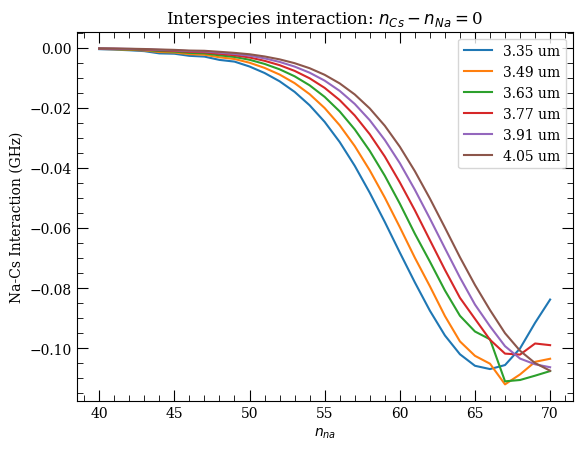

In [13]:
ns = np.linspace(n_start, n_end, n_end - n_start + 1)
for r_index in r_indices:
    plt.plot(ns, interaction[r_index,:], label= str(rs[r_index]) + ' um')
plt.xlabel('$n_{na}$')
plt.ylabel('Na-Cs Interaction (GHz)')
plt.title('Interspecies interaction: $n_{Cs} - n_{Na} = $' + str(dn))
plt.legend()

In [23]:
ns

array([40.        , 40.27272727, 40.54545455, 40.81818182, 41.09090909,
       41.36363636, 41.63636364, 41.90909091, 42.18181818, 42.45454545,
       42.72727273, 43.        , 43.27272727, 43.54545455, 43.81818182,
       44.09090909, 44.36363636, 44.63636364, 44.90909091, 45.18181818,
       45.45454545, 45.72727273, 46.        , 46.27272727, 46.54545455,
       46.81818182, 47.09090909, 47.36363636, 47.63636364, 47.90909091,
       48.18181818, 48.45454545, 48.72727273, 49.        , 49.27272727,
       49.54545455, 49.81818182, 50.09090909, 50.36363636, 50.63636364,
       50.90909091, 51.18181818, 51.45454545, 51.72727273, 52.        ,
       52.27272727, 52.54545455, 52.81818182, 53.09090909, 53.36363636,
       53.63636364, 53.90909091, 54.18181818, 54.45454545, 54.72727273,
       55.        , 55.27272727, 55.54545455, 55.81818182, 56.09090909,
       56.36363636, 56.63636364, 56.90909091, 57.18181818, 57.45454545,
       57.72727273, 58.        , 58.27272727, 58.54545455, 58.81

In [12]:
# Calculate n_Na, n_Na diagonal 

n_start = 40
n_end = 70
dn = 0

options = dict()

options["atom1"] = "na"
options["atom2"] = "na"
options["n1"] = 53 # This value will be replaced!
options["n2"] = 54 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [13]:
rs = np.linspace(3,10, 101)
interactionNaNa = np.zeros((rs.shape[0], n_end - n_start + 1))
compsNaNa = np.zeros((rs.shape[0], n_end - n_start + 1))

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    these_evals, these_comps, these_idxs = utils.get_maximum_overlap_eigenstate(res_evals, res_evecs, res_basis, **options)

    interactionNaNa[:, n] = these_evals
    compsNaNa[:, n] = these_comps


Calculating Na: 40, Calculating Cs: 40
3.0 has already been calculated!
3.07 has already been calculated!
3.14 has already been calculated!
3.21 has already been calculated!
3.2800000000000002 has already been calculated!
3.35 has already been calculated!
3.42 has already been calculated!
3.49 has already been calculated!
3.56 has already been calculated!
3.63 has already been calculated!
3.7 has already been calculated!
3.77 has already been calculated!
3.84 has already been calculated!
3.91 has already been calculated!
3.98 has already been calculated!
4.05 has already been calculated!
4.12 has already been calculated!
4.19 has already been calculated!
4.26 has already been calculated!
4.33 has already been calculated!
4.4 has already been calculated!
4.470000000000001 has already been calculated!
4.54 has already been calculated!
4.61 has already been calculated!
4.68 has already been calculated!
4.75 has already been calculated!
4.82 has already been calculated!
4.890000000000001 h

In [14]:
n_na = np.linspace(n_start, n_end, n_end - n_start + 1)
n_cs = n_na
data = dict()
data['n_na1'] = n_na
data['n_na2'] = n_na
data['r'] = rs
data['interaction_GHz'] = interactionNaNa
data['composition'] = compsNaNa


In [15]:
with open('n_na_n_na_equal.pkl', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

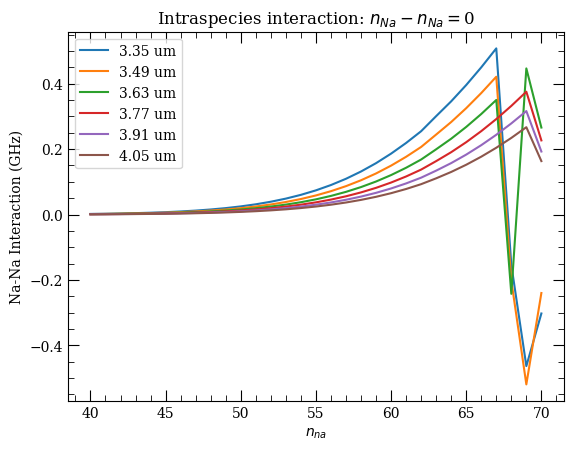

In [16]:
# plot interaction at 3.84 um, which is index 12
r_indices = [5,7,9,11,13,15]

ns = np.linspace(n_start, n_end, n_end - n_start + 1)
for r_index in r_indices:
    plt.plot(ns, interactionNaNa[r_index,:], label= str(rs[r_index]) + ' um')
plt.xlabel('$n_{na}$')
plt.ylabel('Na-Na Interaction (GHz)')
plt.title('Intraspecies interaction: $n_{Na} - n_{Na} = $' + str(dn))
plt.legend()

In [18]:
# Calculate n_Cs, n_Cs diagonal 

n_start = 40
n_end = 70
dn = 0

options = dict()

options["atom1"] = "cs"
options["atom2"] = "cs"
options["n1"] = 53 # This value will be replaced!
options["n2"] = 54 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [19]:
rs = np.linspace(3,10, 101)
interactionCsCs = np.zeros((rs.shape[0], n_end - n_start + 1))
compsCsCs = np.zeros((rs.shape[0], n_end - n_start + 1))

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Cs: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    these_evals, these_comps, these_idxs = utils.get_maximum_overlap_eigenstate(res_evals, res_evecs, res_basis, **options)

    interactionCsCs[:, n] = these_evals
    compsCsCs[:, n] = these_comps


Calculating Cs: 40, Calculating Cs: 40
3.0 has already been calculated!
3.07 has already been calculated!
3.14 has already been calculated!
3.21 has already been calculated!
3.2800000000000002 has already been calculated!
3.35 has already been calculated!
3.42 has already been calculated!
3.49 has already been calculated!
3.56 has already been calculated!
3.63 has already been calculated!
3.7 has already been calculated!
3.77 has already been calculated!
3.84 has already been calculated!
3.91 has already been calculated!
3.98 has already been calculated!
4.05 has already been calculated!
4.12 has already been calculated!
4.19 has already been calculated!
4.26 has already been calculated!
4.33 has already been calculated!
4.4 has already been calculated!
4.470000000000001 has already been calculated!
4.54 has already been calculated!
4.61 has already been calculated!
4.68 has already been calculated!
4.75 has already been calculated!
4.82 has already been calculated!
4.890000000000001 h

In [20]:
n_na = np.linspace(n_start, n_end, n_end - n_start + 1)
n_cs = n_na
data = dict()
data['n_cs1'] = n_na
data['n_cs2'] = n_na
data['r'] = rs
data['interaction_GHz'] = interactionCsCs
data['composition'] = compsCsCs


In [21]:
with open('n_cs_n_cs_equal.pkl', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

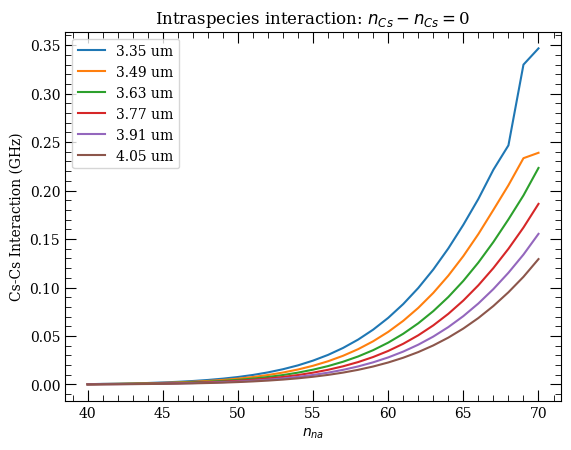

In [19]:
# plot interaction at 3.84 um, which is index 12
r_indices = [5,7,9,11,13,15]

ns = np.linspace(n_start, n_end, n_end - n_start + 1)
for r_index in r_indices:
    plt.plot(ns, interactionCsCs[r_index,:], label= str(rs[r_index]) + ' um')
plt.xlabel('$n_{na}$')
plt.ylabel('Cs-Cs Interaction (GHz)')
plt.title('Intraspecies interaction: $n_{Cs} - n_{Cs} = $' + str(dn))
plt.legend()

In [16]:
# Calculate n_Cs - n_Na = 4 diagonal first

n_start = 40
n_end = 67
dn = 3

options = dict()

options["atom1"] = "na"
options["atom2"] = "cs"
options["n1"] = 53 # This value will be replaced!
options["n2"] = 54 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [17]:
rs = np.linspace(3,10, 101)
interaction4 = np.zeros((rs.shape[0], n_end - n_start + 1))
comps4 = np.zeros((rs.shape[0], n_end - n_start + 1))

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    these_evals, these_comps, these_idxs = utils.get_maximum_overlap_eigenstate(res_evals, res_evecs, res_basis, **options)

    interaction4[:, n] = these_evals
    comps4[:, n] = these_comps


Calculating Na: 40, Calculating Cs: 43
Calculating for [3.0, 3.07, 3.14, 3.21, 3.2800000000000002, 3.35, 3.42, 3.49, 3.56, 3.63, 3.7, 3.77, 3.84, 3.91, 3.98, 4.05, 4.12, 4.19, 4.26, 4.33, 4.4, 4.470000000000001, 4.54, 4.61, 4.68, 4.75, 4.82, 4.890000000000001, 4.96, 5.03, 5.1, 5.17, 5.24, 5.3100000000000005, 5.380000000000001, 5.45, 5.5200000000000005, 5.59, 5.66, 5.73, 5.800000000000001, 5.87, 5.94, 6.01, 6.08, 6.15, 6.220000000000001, 6.290000000000001, 6.36, 6.43, 6.5, 6.57, 6.640000000000001, 6.710000000000001, 6.78, 6.8500000000000005, 6.92, 6.99, 7.0600000000000005, 7.130000000000001, 7.2, 7.2700000000000005, 7.340000000000001, 7.41, 7.48, 7.550000000000001, 7.62, 7.69, 7.760000000000001, 7.83, 7.9, 7.970000000000001, 8.040000000000001, 8.11, 8.18, 8.25, 8.32, 8.39, 8.46, 8.530000000000001, 8.600000000000001, 8.670000000000002, 8.74, 8.81, 8.88, 8.95, 9.02, 9.09, 9.16, 9.23, 9.3, 9.370000000000001, 9.440000000000001, 9.510000000000002, 9.580000000000002, 9.65, 9.72, 9.79000000000

AttributeError: 'PairStateInteractions' object has no attribute 'egvecs'

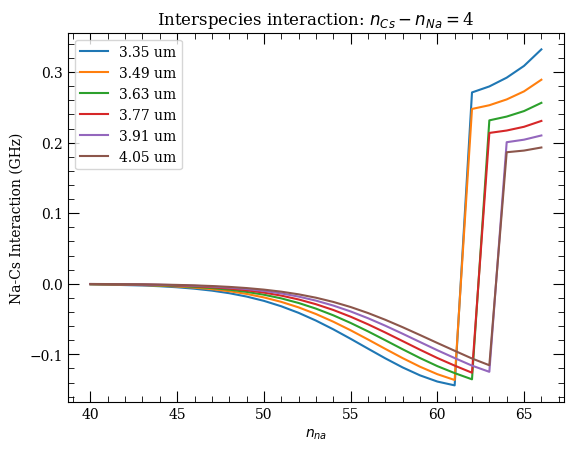

In [25]:
# plot interaction at 3.84 um, which is index 12
r_indices = [5,7,9,11,13,15]

ns = np.linspace(n_start, n_end, n_end - n_start + 1)
for r_index in r_indices:
    plt.plot(ns[0:27], interaction4[r_index,:], label= str(rs[r_index]) + ' um')
plt.xlabel('$n_{na}$')
plt.ylabel('Na-Cs Interaction (GHz)')
plt.title('Interspecies interaction: $n_{Cs} - n_{Na} = $' + str(dn))
plt.legend()

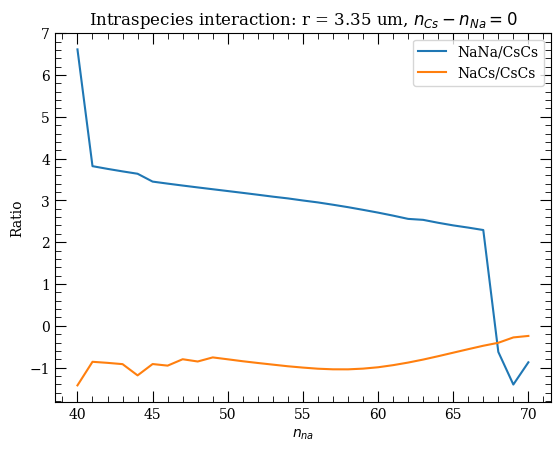

In [36]:
# Na-Cs interaction vs Na-Na and Cs-Cs interaction on the diagonal
# First at 3.35 um and then at 4.05 um
ns = np.linspace(40, 70, 31)
plt.plot(ns, interactionNaNa[5,:] / interactionCsCs[5,:], label= 'NaNa/CsCs')
plt.plot(ns, interaction[5,:] / interactionCsCs[5,:], label= 'NaCs/CsCs')
plt.xlabel('$n_{na}$')
plt.ylabel('Ratio')
plt.title('Intraspecies interaction: r = 3.35 um, $n_{Cs} - n_{Na} = 0$')
plt.legend()

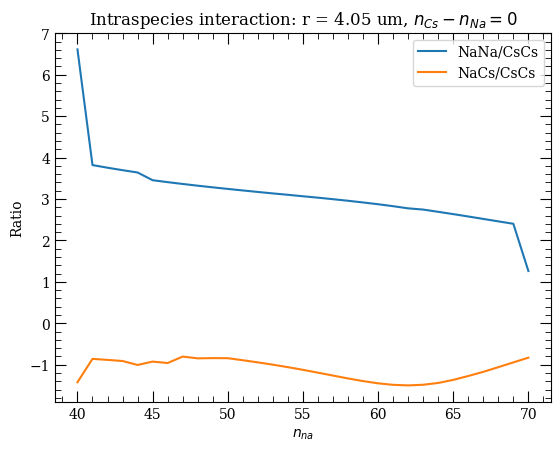

In [37]:
# Na-Cs interaction vs Na-Na and Cs-Cs interaction on the diagonal
# First at 3.35 um and then at 4.05 um
ns = np.linspace(40, 70, 31)
plt.plot(ns, interactionNaNa[15,:] / interactionCsCs[15,:], label= 'NaNa/CsCs')
plt.plot(ns, interaction[15,:] / interactionCsCs[15,:], label= 'NaCs/CsCs')
plt.xlabel('$n_{na}$')
plt.ylabel('Ratio')
plt.title('Intraspecies interaction: r = 4.05 um, $n_{Cs} - n_{Na} = 0$')
plt.legend()

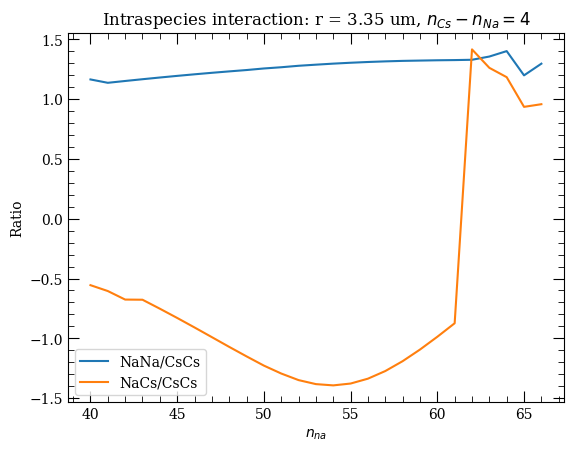

In [38]:
# Na-Cs interaction vs Na-Na and Cs-Cs interaction on the diagonal
# First at 3.35 um and then at 4.05 um
ns = np.linspace(40, 66, 27)
plt.plot(ns, interactionNaNa[5,0:27] / interactionCsCs[5,4:31], label= 'NaNa/CsCs')
plt.plot(ns, interaction4[5,:] / interactionCsCs[5,4:31], label= 'NaCs/CsCs')
plt.xlabel('$n_{na}$')
plt.ylabel('Ratio')
plt.title('Intraspecies interaction: r = 3.35 um, $n_{Cs} - n_{Na} = 4$')
plt.legend()

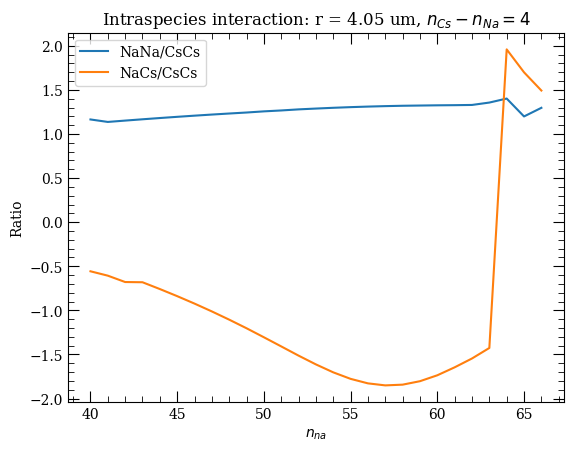

In [39]:
# Na-Cs interaction vs Na-Na and Cs-Cs interaction on the diagonal
# First at 3.35 um and then at 4.05 um
ns = np.linspace(40, 66, 27)
plt.plot(ns, interactionNaNa[5,0:27] / interactionCsCs[5,4:31], label= 'NaNa/CsCs')
plt.plot(ns, interaction4[15,:] / interactionCsCs[15,4:31], label= 'NaCs/CsCs')
plt.xlabel('$n_{na}$')
plt.ylabel('Ratio')
plt.title('Intraspecies interaction: r = 4.05 um, $n_{Cs} - n_{Na} = 4$')
plt.legend()

In [40]:
# Investigate n_Na = n_Cs attractiveness
options = dict()

options["atom1"] = "na"
options["atom2"] = "cs"
options["n1"] = 55 # This value will be replaced!
options["n2"] = 55 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [41]:
res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

3.0 has already been calculated!
3.07 has already been calculated!
3.14 has already been calculated!
3.21 has already been calculated!
3.2800000000000002 has already been calculated!
3.35 has already been calculated!
3.42 has already been calculated!
3.49 has already been calculated!
3.56 has already been calculated!
3.63 has already been calculated!
3.7 has already been calculated!
3.77 has already been calculated!
3.84 has already been calculated!
3.91 has already been calculated!
3.98 has already been calculated!
4.05 has already been calculated!
4.12 has already been calculated!
4.19 has already been calculated!
4.26 has already been calculated!
4.33 has already been calculated!
4.4 has already been calculated!
4.470000000000001 has already been calculated!
4.54 has already been calculated!
4.61 has already been calculated!
4.68 has already been calculated!
4.75 has already been calculated!
4.82 has already been calculated!
4.890000000000001 has already been calculated!
4.96 has al

In [66]:
import arc

# Pick r = 4.05 um which is index 15
this_evals, this_comps, this_idxs = utils.get_maximum_overlap_eigenstate([res_evals[15]], [res_evecs[15]], res_basis, **options)
state_list, state_comps = utils.find_highest_n_comps(res_evecs[15][:,this_idxs], 10, res_basis)
print(state_list)
print(state_comps)
eVToGHz = 2.417989242 * 1e14 / 1e9
JToGHz = 1.509190179 * 1e33 / 1e9
atom1 = arc.Sodium()
atom2 = arc.Cesium()

myE = atom1.getEnergy(options["n1"], options["l1"], options["j1"]) * eVToGHz + atom2.getEnergy(options["n2"], options["l2"], options["j2"]) * eVToGHz
myEZeeman = atom1.getZeemanEnergyShift(options["l1"], options["j1"], 0.5, options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(options["l2"], options["j2"], 0.5, options["Bz"] * 1e-4) * JToGHz
state = state_list[1]
otherE = atom1.getEnergy(state[0], state[1], state[2]) * eVToGHz + atom2.getEnergy(state[4], state[5], state[6]) * eVToGHz
otherEZeeman = atom1.getZeemanEnergyShift(state[1], state[2], state[3], options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(state[5], state[6], state[7], options["Bz"] * 1e-4) * JToGHz

defect = myE + myEZeeman - otherE - otherEZeeman
print(defect)

[[55, 0, 0.5, 0.5, 55, 0, 0.5, 0.5], [54, 1, 1.5, 0.5, 55, 1, 0.5, 0.5], [54, 1, 1.5, 1.5, 55, 1, 0.5, -0.5], [54, 1, 0.5, 0.5, 55, 1, 0.5, 0.5], [54, 1, 1.5, 0.5, 55, 1, 1.5, 0.5], [54, 1, 0.5, 0.5, 55, 1, 1.5, 0.5], [54, 1, 0.5, -0.5, 55, 1, 1.5, 1.5], [55, 1, 1.5, 0.5, 54, 1, 1.5, 0.5], [54, 1, 1.5, 1.5, 55, 1, 1.5, -0.5], [54, 1, 1.5, -0.5, 55, 1, 1.5, 1.5]]
(array([0.98503546]), array([0.00538384]), array([0.00386639]), array([0.00309307]), array([0.0007229]), array([0.00037406]), array([0.00027463]), array([0.00013823]), array([0.00013562]), array([0.0001339]))
-0.5612467423937789


In [69]:
# Investigate n_Na = n_Cs attractiveness
options = dict()

options["atom1"] = "na"
options["atom2"] = "cs"
options["n1"] = 55 # This value will be replaced!
options["n2"] = 55 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [79]:
rs = np.linspace(6.99, 6.99, 1)

n_start = 40
n_end = 70
dn = 0

defects = np.zeros((rs.shape[0], n_end - n_start + 1))
states = []

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    this_evals, this_comps, this_idxs = utils.get_maximum_overlap_eigenstate([res_evals[0]], [res_evecs[0]], res_basis, **options)
    state_list, state_comps = utils.find_highest_n_comps(res_evecs[0][:,this_idxs], 10, res_basis)
    eVToGHz = 2.417989242 * 1e14 / 1e9
    JToGHz = 1.509190179 * 1e33 / 1e9
    atom1 = arc.Sodium()
    atom2 = arc.Cesium()
    
    myE = atom1.getEnergy(options["n1"], options["l1"], options["j1"]) * eVToGHz + atom2.getEnergy(options["n2"], options["l2"], options["j2"]) * eVToGHz
    myEZeeman = atom1.getZeemanEnergyShift(options["l1"], options["j1"], 0.5, options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(options["l2"], options["j2"], 0.5, options["Bz"] * 1e-4) * JToGHz
    state = state_list[1]
    otherE = atom1.getEnergy(state[0], state[1], state[2]) * eVToGHz + atom2.getEnergy(state[4], state[5], state[6]) * eVToGHz
    otherEZeeman = atom1.getZeemanEnergyShift(state[1], state[2], state[3], options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(state[5], state[6], state[7], options["Bz"] * 1e-4) * JToGHz
    
    defect = myE + myEZeeman - otherE - otherEZeeman

    defects[:, n] = defect
    states.append(state)

Calculating Na: 40, Calculating Cs: 40
6.99 has already been calculated!
Calculating Na: 41, Calculating Cs: 41
6.99 has already been calculated!
Calculating Na: 42, Calculating Cs: 42
6.99 has already been calculated!
Calculating Na: 43, Calculating Cs: 43
6.99 has already been calculated!
Calculating Na: 44, Calculating Cs: 44
6.99 has already been calculated!
Calculating Na: 45, Calculating Cs: 45
6.99 has already been calculated!
Calculating Na: 46, Calculating Cs: 46
6.99 has already been calculated!
Calculating Na: 47, Calculating Cs: 47
6.99 has already been calculated!
Calculating Na: 48, Calculating Cs: 48
6.99 has already been calculated!
Calculating Na: 49, Calculating Cs: 49
6.99 has already been calculated!
Calculating Na: 50, Calculating Cs: 50
6.99 has already been calculated!
Calculating Na: 51, Calculating Cs: 51
6.99 has already been calculated!
Calculating Na: 52, Calculating Cs: 52
6.99 has already been calculated!
Calculating Na: 53, Calculating Cs: 53
6.99 has alr

In [80]:
defects

array([[-4.70000838e+00, -4.07680745e+00, -3.54099663e+00,
        -3.07897452e+00, -2.67948833e+00, -2.33318780e+00,
        -2.03227143e+00, -1.77020441e+00, -1.54149250e+00,
        -1.34149993e+00, -1.16630200e+00, -1.01256530e+00,
        -8.77449884e-01, -7.58529086e-01, -6.53723557e-01,
        -5.61246742e-01, -4.79559705e-01, -4.07333528e-01,
        -3.43417942e-01, -2.86815050e-01, -2.36657261e-01,
        -1.92188702e-01, -1.52749514e-01, -1.17762548e-01,
        -8.67220659e-02, -3.37748824e-02, -1.03294652e-02,
         1.04068634e-02, -2.13875219e-03,  1.48564901e-02,
         2.98916835e-02]])

In [81]:
states

[[39, 1, 1.5, 0.5, 40, 1, 0.5, 0.5],
 [40, 1, 1.5, 0.5, 41, 1, 0.5, 0.5],
 [41, 1, 1.5, 0.5, 42, 1, 0.5, 0.5],
 [42, 1, 1.5, 0.5, 43, 1, 0.5, 0.5],
 [43, 1, 1.5, 0.5, 44, 1, 0.5, 0.5],
 [44, 1, 1.5, 0.5, 45, 1, 0.5, 0.5],
 [45, 1, 1.5, 0.5, 46, 1, 0.5, 0.5],
 [46, 1, 1.5, 0.5, 47, 1, 0.5, 0.5],
 [47, 1, 1.5, 0.5, 48, 1, 0.5, 0.5],
 [48, 1, 1.5, 0.5, 49, 1, 0.5, 0.5],
 [49, 1, 1.5, 0.5, 50, 1, 0.5, 0.5],
 [50, 1, 1.5, 0.5, 51, 1, 0.5, 0.5],
 [51, 1, 1.5, 0.5, 52, 1, 0.5, 0.5],
 [52, 1, 1.5, 0.5, 53, 1, 0.5, 0.5],
 [53, 1, 1.5, 0.5, 54, 1, 0.5, 0.5],
 [54, 1, 1.5, 0.5, 55, 1, 0.5, 0.5],
 [55, 1, 1.5, 0.5, 56, 1, 0.5, 0.5],
 [56, 1, 1.5, 0.5, 57, 1, 0.5, 0.5],
 [57, 1, 1.5, 0.5, 58, 1, 0.5, 0.5],
 [58, 1, 1.5, 0.5, 59, 1, 0.5, 0.5],
 [59, 1, 1.5, 0.5, 60, 1, 0.5, 0.5],
 [60, 1, 1.5, 0.5, 61, 1, 0.5, 0.5],
 [61, 1, 1.5, 0.5, 62, 1, 0.5, 0.5],
 [62, 1, 1.5, 0.5, 63, 1, 0.5, 0.5],
 [63, 1, 1.5, 0.5, 64, 1, 0.5, 0.5],
 [64, 1, 0.5, 0.5, 65, 1, 0.5, 0.5],
 [65, 1, 0.5, 0.5, 66, 1, 0.5, 0.5],
 

Text(0.5, 1.0, '$r = 6.99$ um, $n_{Cs} - n_{Na} = 0$')

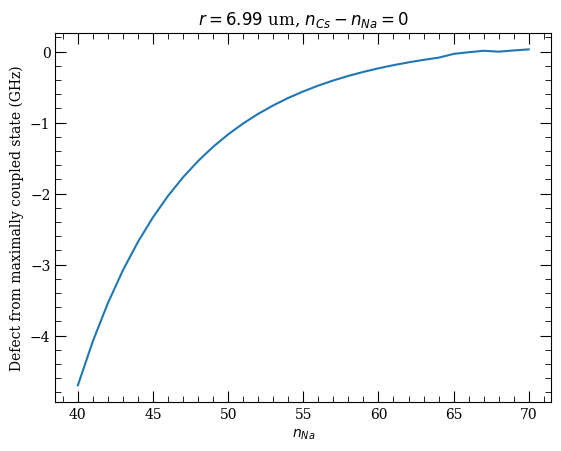

In [83]:
ns = np.linspace(n_start, n_end, n_end - n_start + 1)
plt.plot(ns, defects[0,:])
plt.xlabel('$n_{Na}$')
plt.ylabel('Defect from maximally coupled state (GHz)')
plt.title('$r = 6.99$ um, $n_{Cs} - n_{Na} = 0$')

In [84]:
# Investigate n_Na = n_Cs attractiveness
options = dict()

options["atom1"] = "cs"
options["atom2"] = "cs"
options["n1"] = 55 # This value will be replaced!
options["n2"] = 55 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [85]:
rs = np.linspace(6.99, 6.99, 1)

n_start = 40
n_end = 70
dn = 0

defects = np.zeros((rs.shape[0], n_end - n_start + 1))
states = []

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    this_evals, this_comps, this_idxs = utils.get_maximum_overlap_eigenstate([res_evals[0]], [res_evecs[0]], res_basis, **options)
    state_list, state_comps = utils.find_highest_n_comps(res_evecs[0][:,this_idxs], 10, res_basis)
    eVToGHz = 2.417989242 * 1e14 / 1e9
    JToGHz = 1.509190179 * 1e33 / 1e9
    atom1 = arc.Cesium()
    atom2 = arc.Cesium()
    
    myE = atom1.getEnergy(options["n1"], options["l1"], options["j1"]) * eVToGHz + atom2.getEnergy(options["n2"], options["l2"], options["j2"]) * eVToGHz
    myEZeeman = atom1.getZeemanEnergyShift(options["l1"], options["j1"], 0.5, options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(options["l2"], options["j2"], 0.5, options["Bz"] * 1e-4) * JToGHz
    state = state_list[1]
    otherE = atom1.getEnergy(state[0], state[1], state[2]) * eVToGHz + atom2.getEnergy(state[4], state[5], state[6]) * eVToGHz
    otherEZeeman = atom1.getZeemanEnergyShift(state[1], state[2], state[3], options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(state[5], state[6], state[7], options["Bz"] * 1e-4) * JToGHz
    
    defect = myE + myEZeeman - otherE - otherEZeeman

    defects[:, n] = defect
    states.append(state)

Calculating Na: 40, Calculating Cs: 40
6.99 has already been calculated!
Calculating Na: 41, Calculating Cs: 41
6.99 has already been calculated!
Calculating Na: 42, Calculating Cs: 42
6.99 has already been calculated!
Calculating Na: 43, Calculating Cs: 43
6.99 has already been calculated!
Calculating Na: 44, Calculating Cs: 44
6.99 has already been calculated!
Calculating Na: 45, Calculating Cs: 45
6.99 has already been calculated!
Calculating Na: 46, Calculating Cs: 46
6.99 has already been calculated!
Calculating Na: 47, Calculating Cs: 47
6.99 has already been calculated!
Calculating Na: 48, Calculating Cs: 48
6.99 has already been calculated!
Calculating Na: 49, Calculating Cs: 49
6.99 has already been calculated!
Calculating Na: 50, Calculating Cs: 50
6.99 has already been calculated!
Calculating Na: 51, Calculating Cs: 51
6.99 has already been calculated!
Calculating Na: 52, Calculating Cs: 52
6.99 has already been calculated!
Calculating Na: 53, Calculating Cs: 53
6.99 has alr

Text(0.5, 1.0, '$r = 6.99$ um, $n_{Cs} - n_{Cs} = 0$')

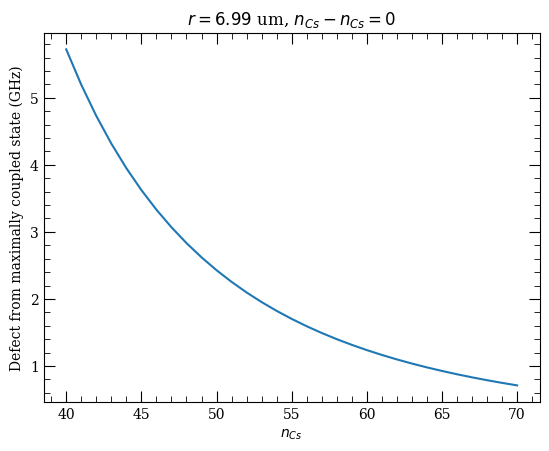

In [87]:
ns = np.linspace(n_start, n_end, n_end - n_start + 1)
plt.plot(ns, defects[0,:])
plt.xlabel('$n_{Cs}$')
plt.ylabel('Defect from maximally coupled state (GHz)')
plt.title('$r = 6.99$ um, $n_{Cs} - n_{Cs} = 0$')

In [88]:
# Investigate n_Na = n_Cs attractiveness
options = dict()

options["atom1"] = "na"
options["atom2"] = "na"
options["n1"] = 55 # This value will be replaced!
options["n2"] = 55 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [89]:
rs = np.linspace(6.99, 6.99, 1)

n_start = 40
n_end = 70
dn = 0

defects = np.zeros((rs.shape[0], n_end - n_start + 1))
states = []

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    this_evals, this_comps, this_idxs = utils.get_maximum_overlap_eigenstate([res_evals[0]], [res_evecs[0]], res_basis, **options)
    state_list, state_comps = utils.find_highest_n_comps(res_evecs[0][:,this_idxs], 10, res_basis)
    eVToGHz = 2.417989242 * 1e14 / 1e9
    JToGHz = 1.509190179 * 1e33 / 1e9
    atom1 = arc.Sodium()
    atom2 = arc.Sodium()
    
    myE = atom1.getEnergy(options["n1"], options["l1"], options["j1"]) * eVToGHz + atom2.getEnergy(options["n2"], options["l2"], options["j2"]) * eVToGHz
    myEZeeman = atom1.getZeemanEnergyShift(options["l1"], options["j1"], 0.5, options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(options["l2"], options["j2"], 0.5, options["Bz"] * 1e-4) * JToGHz
    state = state_list[1]
    otherE = atom1.getEnergy(state[0], state[1], state[2]) * eVToGHz + atom2.getEnergy(state[4], state[5], state[6]) * eVToGHz
    otherEZeeman = atom1.getZeemanEnergyShift(state[1], state[2], state[3], options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(state[5], state[6], state[7], options["Bz"] * 1e-4) * JToGHz
    
    defect = myE + myEZeeman - otherE - otherEZeeman

    defects[:, n] = defect
    states.append(state)

Calculating Na: 40, Calculating Cs: 40
6.99 has already been calculated!
Calculating Na: 41, Calculating Cs: 41
6.99 has already been calculated!
Calculating Na: 42, Calculating Cs: 42
6.99 has already been calculated!
Calculating Na: 43, Calculating Cs: 43
6.99 has already been calculated!
Calculating Na: 44, Calculating Cs: 44
6.99 has already been calculated!
Calculating Na: 45, Calculating Cs: 45
6.99 has already been calculated!
Calculating Na: 46, Calculating Cs: 46
6.99 has already been calculated!
Calculating Na: 47, Calculating Cs: 47
6.99 has already been calculated!
Calculating Na: 48, Calculating Cs: 48
6.99 has already been calculated!
Calculating Na: 49, Calculating Cs: 49
6.99 has already been calculated!
Calculating Na: 50, Calculating Cs: 50
6.99 has already been calculated!
Calculating Na: 51, Calculating Cs: 51
6.99 has already been calculated!
Calculating Na: 52, Calculating Cs: 52
6.99 has already been calculated!
Calculating Na: 53, Calculating Cs: 53
6.99 has alr

Text(0.5, 1.0, '$r = 6.99$ um, $n_{Na} - n_{Na} = 0$')

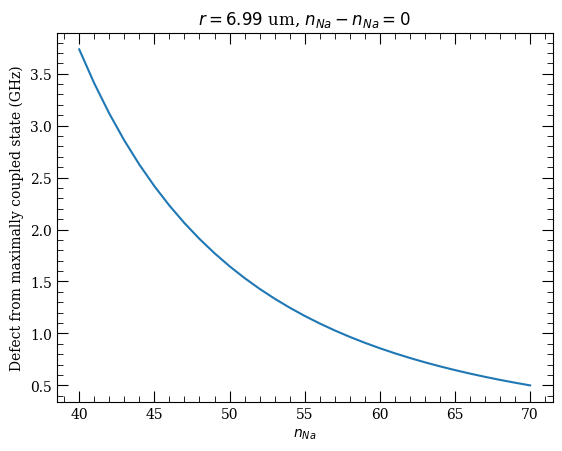

In [90]:
ns = np.linspace(n_start, n_end, n_end - n_start + 1)
plt.plot(ns, defects[0,:])
plt.xlabel('$n_{Na}$')
plt.ylabel('Defect from maximally coupled state (GHz)')
plt.title('$r = 6.99$ um, $n_{Na} - n_{Na} = 0$')

In [91]:
states

[[40, 1, 1.5, 0.5, 39, 1, 1.5, 0.5],
 [40, 1, 1.5, 0.5, 41, 1, 1.5, 0.5],
 [41, 1, 1.5, 0.5, 42, 1, 1.5, 0.5],
 [42, 1, 1.5, 0.5, 43, 1, 1.5, 0.5],
 [44, 1, 1.5, 0.5, 43, 1, 1.5, 0.5],
 [45, 1, 1.5, 0.5, 44, 1, 1.5, 0.5],
 [46, 1, 1.5, 0.5, 45, 1, 1.5, 0.5],
 [46, 1, 1.5, 0.5, 47, 1, 1.5, 0.5],
 [47, 1, 1.5, 0.5, 48, 1, 1.5, 0.5],
 [48, 1, 1.5, 0.5, 49, 1, 1.5, 0.5],
 [50, 1, 1.5, 0.5, 49, 1, 1.5, 0.5],
 [50, 1, 1.5, 0.5, 51, 1, 1.5, 0.5],
 [52, 1, 1.5, 0.5, 51, 1, 1.5, 0.5],
 [53, 1, 1.5, 0.5, 52, 1, 1.5, 0.5],
 [54, 1, 1.5, 0.5, 53, 1, 1.5, 0.5],
 [54, 1, 1.5, 0.5, 55, 1, 1.5, 0.5],
 [56, 1, 1.5, 0.5, 55, 1, 1.5, 0.5],
 [57, 1, 1.5, 0.5, 56, 1, 1.5, 0.5],
 [57, 1, 1.5, 0.5, 58, 1, 1.5, 0.5],
 [58, 1, 1.5, 0.5, 59, 1, 1.5, 0.5],
 [59, 1, 1.5, 0.5, 60, 1, 1.5, 0.5],
 [60, 1, 1.5, 0.5, 61, 1, 1.5, 0.5],
 [62, 1, 1.5, 0.5, 61, 1, 1.5, 0.5],
 [63, 1, 1.5, 0.5, 62, 1, 1.5, 0.5],
 [64, 1, 1.5, 0.5, 63, 1, 1.5, 0.5],
 [65, 1, 1.5, 0.5, 64, 1, 1.5, 0.5],
 [66, 1, 1.5, 0.5, 65, 1, 1.5, 0.5],
 

In [ ]:
# Investigate n_Na = n_Cs attractiveness
options = dict()

options["atom1"] = "na"
options["atom2"] = "na"
options["n1"] = 55 # This value will be replaced!
options["n2"] = 55 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [92]:
rs = np.linspace(3.35, 3.35, 1)

n_start = 40
n_end = 70
dn = 0

defects = np.zeros((rs.shape[0], n_end - n_start + 1))
states = []

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    this_evals, this_comps, this_idxs = utils.get_maximum_overlap_eigenstate([res_evals[0]], [res_evecs[0]], res_basis, **options)
    state_list, state_comps = utils.find_highest_n_comps(res_evecs[0][:,this_idxs], 10, res_basis)
    eVToGHz = 2.417989242 * 1e14 / 1e9
    JToGHz = 1.509190179 * 1e33 / 1e9
    atom1 = arc.Sodium()
    atom2 = arc.Sodium()
    
    myE = atom1.getEnergy(options["n1"], options["l1"], options["j1"]) * eVToGHz + atom2.getEnergy(options["n2"], options["l2"], options["j2"]) * eVToGHz
    myEZeeman = atom1.getZeemanEnergyShift(options["l1"], options["j1"], 0.5, options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(options["l2"], options["j2"], 0.5, options["Bz"] * 1e-4) * JToGHz
    state = state_list[1]
    otherE = atom1.getEnergy(state[0], state[1], state[2]) * eVToGHz + atom2.getEnergy(state[4], state[5], state[6]) * eVToGHz
    otherEZeeman = atom1.getZeemanEnergyShift(state[1], state[2], state[3], options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(state[5], state[6], state[7], options["Bz"] * 1e-4) * JToGHz
    
    defect = myE + myEZeeman - otherE - otherEZeeman

    defects[:, n] = defect
    states.append(state)

Calculating Na: 40, Calculating Cs: 40
3.35 has already been calculated!
Calculating Na: 41, Calculating Cs: 41
3.35 has already been calculated!
Calculating Na: 42, Calculating Cs: 42
3.35 has already been calculated!
Calculating Na: 43, Calculating Cs: 43
3.35 has already been calculated!
Calculating Na: 44, Calculating Cs: 44
3.35 has already been calculated!
Calculating Na: 45, Calculating Cs: 45
3.35 has already been calculated!
Calculating Na: 46, Calculating Cs: 46
3.35 has already been calculated!
Calculating Na: 47, Calculating Cs: 47
3.35 has already been calculated!
Calculating Na: 48, Calculating Cs: 48
3.35 has already been calculated!
Calculating Na: 49, Calculating Cs: 49
3.35 has already been calculated!
Calculating Na: 50, Calculating Cs: 50
3.35 has already been calculated!
Calculating Na: 51, Calculating Cs: 51
3.35 has already been calculated!
Calculating Na: 52, Calculating Cs: 52
3.35 has already been calculated!
Calculating Na: 53, Calculating Cs: 53
3.35 has alr

Text(0.5, 1.0, '$r = 3.35$ um, $n_{Na} - n_{Na} = 0$')

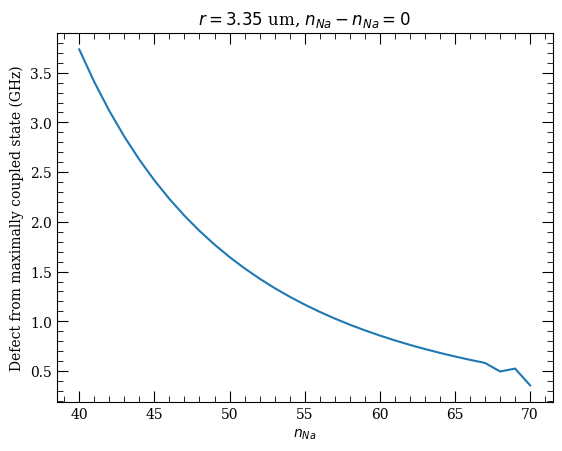

In [93]:
ns = np.linspace(n_start, n_end, n_end - n_start + 1)
plt.plot(ns, defects[0,:])
plt.xlabel('$n_{Na}$')
plt.ylabel('Defect from maximally coupled state (GHz)')
plt.title('$r = 3.35$ um, $n_{Na} - n_{Na} = 0$')

In [94]:
# Look at n_Cs - n_Na = 4

# Investigate n_Na = n_Cs attractiveness
options = dict()

options["atom1"] = "na"
options["atom2"] = "cs"
options["n1"] = 55 # This value will be replaced!
options["n2"] = 55 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 8.8

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations_real.db')

In [95]:
rs = np.linspace(6.99, 6.99, 1)

n_start = 40
n_end = 66
dn = 4

defects = np.zeros((rs.shape[0], n_end - n_start + 1))
states = []

for n in range(n_end - n_start + 1):

    n_na = n_start + n
    n_cs = n_start + n + dn
    print('Calculating Na: ' + str(n_na) + ', Calculating Cs: ' + str(n_cs))

    options["n1"] = n_na
    options["n2"] = n_cs

    res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

    this_evals, this_comps, this_idxs = utils.get_maximum_overlap_eigenstate([res_evals[0]], [res_evecs[0]], res_basis, **options)
    state_list, state_comps = utils.find_highest_n_comps(res_evecs[0][:,this_idxs], 10, res_basis)
    eVToGHz = 2.417989242 * 1e14 / 1e9
    JToGHz = 1.509190179 * 1e33 / 1e9
    atom1 = arc.Sodium()
    atom2 = arc.Cesium()
    
    myE = atom1.getEnergy(options["n1"], options["l1"], options["j1"]) * eVToGHz + atom2.getEnergy(options["n2"], options["l2"], options["j2"]) * eVToGHz
    myEZeeman = atom1.getZeemanEnergyShift(options["l1"], options["j1"], 0.5, options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(options["l2"], options["j2"], 0.5, options["Bz"] * 1e-4) * JToGHz
    state = state_list[1]
    otherE = atom1.getEnergy(state[0], state[1], state[2]) * eVToGHz + atom2.getEnergy(state[4], state[5], state[6]) * eVToGHz
    otherEZeeman = atom1.getZeemanEnergyShift(state[1], state[2], state[3], options["Bz"] * 1e-4) * JToGHz + atom2.getZeemanEnergyShift(state[5], state[6], state[7], options["Bz"] * 1e-4) * JToGHz
    
    defect = myE + myEZeeman - otherE - otherEZeeman

    defects[:, n] = defect
    states.append(state)

Calculating Na: 40, Calculating Cs: 44
6.99 has already been calculated!
Calculating Na: 41, Calculating Cs: 45
6.99 has already been calculated!
Calculating Na: 42, Calculating Cs: 46
6.99 has already been calculated!
Calculating Na: 43, Calculating Cs: 47
6.99 has already been calculated!
Calculating Na: 44, Calculating Cs: 48
6.99 has already been calculated!
Calculating Na: 45, Calculating Cs: 49
6.99 has already been calculated!
Calculating Na: 46, Calculating Cs: 50
6.99 has already been calculated!
Calculating Na: 47, Calculating Cs: 51
6.99 has already been calculated!
Calculating Na: 48, Calculating Cs: 52
6.99 has already been calculated!
Calculating Na: 49, Calculating Cs: 53
6.99 has already been calculated!
Calculating Na: 50, Calculating Cs: 54
6.99 has already been calculated!
Calculating Na: 51, Calculating Cs: 55
6.99 has already been calculated!
Calculating Na: 52, Calculating Cs: 56
6.99 has already been calculated!
Calculating Na: 53, Calculating Cs: 57
6.99 has alr

Text(0.5, 1.0, '$r = 6.99$ um, $n_{Cs} - n_{Na} = 4$')

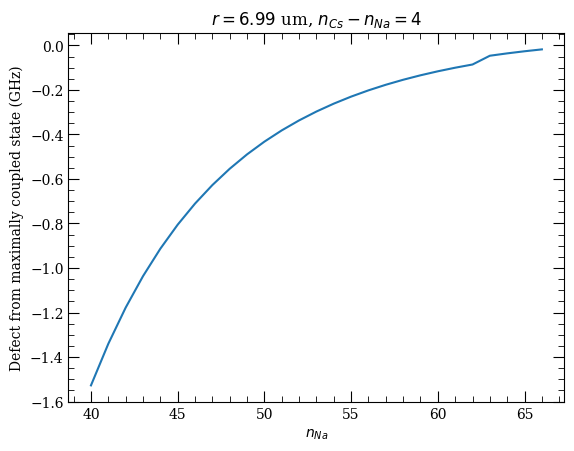

In [97]:
ns = np.linspace(n_start, n_end, n_end - n_start + 1)
plt.plot(ns, defects[0,:])
plt.xlabel('$n_{Na}$')
plt.ylabel('Defect from maximally coupled state (GHz)')
plt.title('$r = 6.99$ um, $n_{Cs} - n_{Na} = 4$')

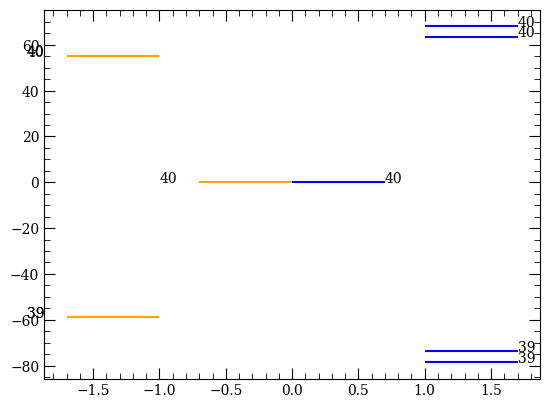

In [105]:
result = utils.find_states_within(arc.Cesium(), 40, 0, 0.5, 0.5, dE = 100, dl = 1)
result2 = utils.find_states_within(arc.Sodium(), 40, 0, 0.5, 0.5, dE = 100, dl = 1)
utils.visualize_states(result, result2)